

```
Рубежный контроль №1 по курсу ТМО
Каркавина Анастасия РТ5-71
вариант 1 сет 8

задание 

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

```



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [54]:
url = 'https://raw.githubusercontent.com/NastjaK666/uni/master/googleplaystore.csv'
data = pd.read_csv(url)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [56]:
# Удаление колонки Rating
data1 = data.drop(columns='Rating')
(data.shape, data1.shape)

((10841, 13), (10841, 12))

In [57]:
# Удаления строк с пустыми значениями:
data2 = data1.dropna(axis=0, how='any')
(data1.shape, data2.shape)

((10841, 12), (10829, 12))

In [58]:
# Проверка
data2.isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [59]:
data2.dtypes

App               object
Category          object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [0]:
ClassCoded = data2[['Current Ver']]
le = LabelEncoder()
data2[['Current Ver']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Current Ver']])

In [0]:
ClassCoded = data2[['Android Ver']]
le = LabelEncoder()
data2[['Android Ver']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Android Ver']])

In [0]:
ClassCoded = data2[['Price']]
le = LabelEncoder()
data2[['Price']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Price']])

In [0]:
ClassCoded = data2[['Content Rating']]
le = LabelEncoder()
data2[['Content Rating']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Content Rating']])

In [0]:
ClassCoded = data2[['Genres']]
le = LabelEncoder()
data2[['Genres']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Genres']])

In [0]:
ClassCoded = data2[['Type']]
le = LabelEncoder()
data2[['Type']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Type']])

In [0]:
ClassCoded = data2[['Installs']]
le = LabelEncoder()
data2[['Installs']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Installs']])

In [0]:
ClassCoded = data2[['Size']]
le = LabelEncoder()
data2[['Size']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Size']])

In [0]:
ClassCoded = data2[['Category']]
le = LabelEncoder()
data2[['Category']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Category']])

In [0]:
ClassCoded = data2[['App']]
le = LabelEncoder()
data2[['App']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['App']])

In [0]:
ClassCoded = data2[['Reviews']]
le = LabelEncoder()
data2[['Reviews']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Reviews']])

In [0]:
ClassCoded = data2[['Last Updated']]
le = LabelEncoder()
data2[['Last Updated']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Last Updated']])

In [74]:
data2.dtypes

App               float64
Category          float64
Reviews           float64
Size              float64
Installs          float64
Type              float64
Price             float64
Content Rating    float64
Genres            float64
Last Updated      float64
Current Ver       float64
Android Ver       float64
dtype: object

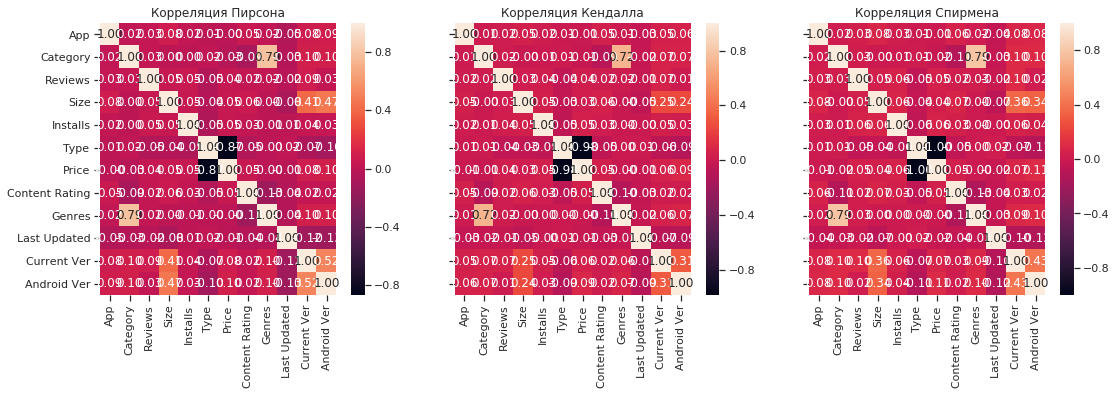

In [76]:
#Кореляционный анализ

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(18,5))
sns.heatmap(data2.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data2.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data2.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
ax[0].title.set_text('Корреляция Пирсона')
ax[1].title.set_text('Корреляция Кендалла')
ax[2].title.set_text('Корреляция Спирмена')

На основе вышепредставленной тепловой карты корреляции можно сделать вывод,
что существует обратная зависимость цены от типа (free as 1 -0 as price) и прямая зависимость жанра от категории. Размер приложений зависит от версии андроида и от текущей версии приложения.
Рассмотрим графики зависимостей этих признаков:

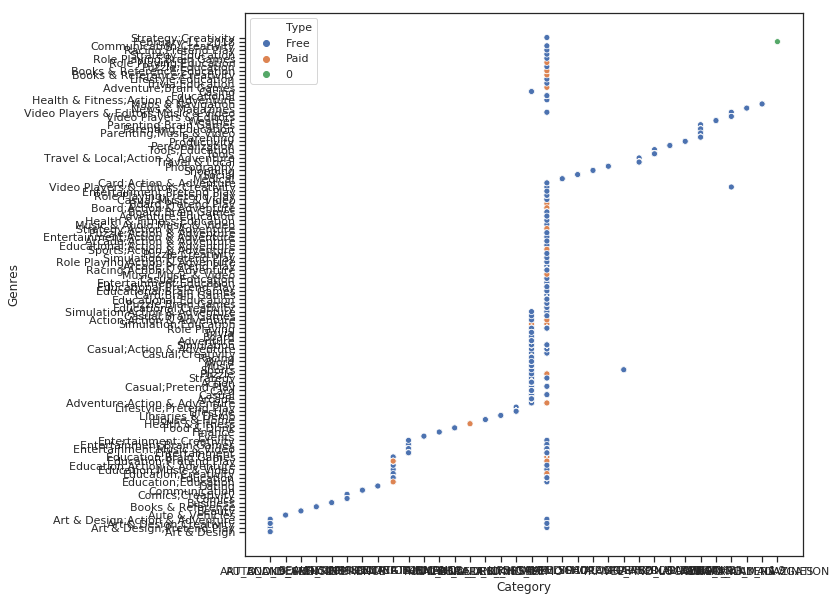

In [88]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Category', y='Genres', data=data,  hue='Type')

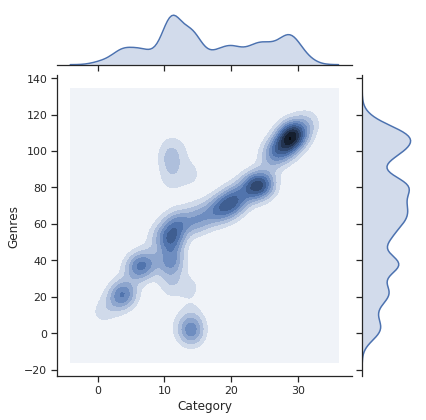

In [96]:
sns.jointplot(x='Category', y='Genres', data=data2, kind = "kde")

Из этих диаграмм слудует, что зная жанр можно предсказать категорию. Возможно построить модель обучения для классификации жанров.